Time Series Forecasting Using Python

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [124]:
df=pd.read_csv("Dataset of gold monthly price.csv")
df.tail(10)

,Date,Price
837,2019-10,1494.765
838,2019-11,1471.921
839,2019-12,1480.025
840,2020-01,1560.668
841,2020-02,1598.818
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [125]:
df.shape

(847, 2)

In [126]:
print(f"Date range of gold prices available from- {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Date range of gold prices available from- 1950-01 to 2020-07


In [127]:
date =pd.date_range(start = '1/1/1950',end='8/1/2020',freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [128]:
df['month'] = date
df.drop('Date',axis=1,inplace= True)
df = df.set_index('month')
df.head() 

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


Now Doing EDA(Exploratory Data Analysis)

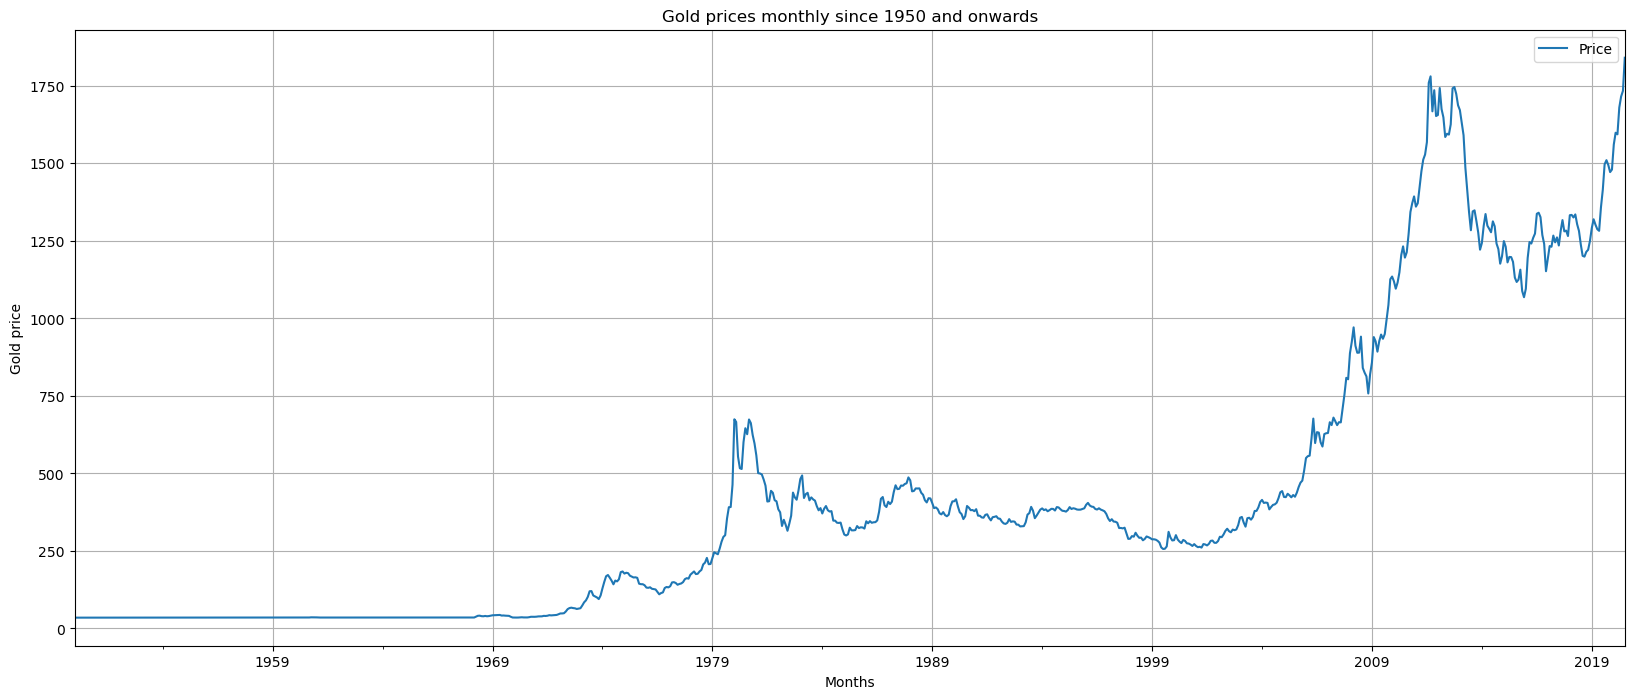

In [129]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 and onwards")
plt.xlabel("Months")
plt.ylabel("Gold price")
plt.grid()

In [130]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


Box Plot Graph

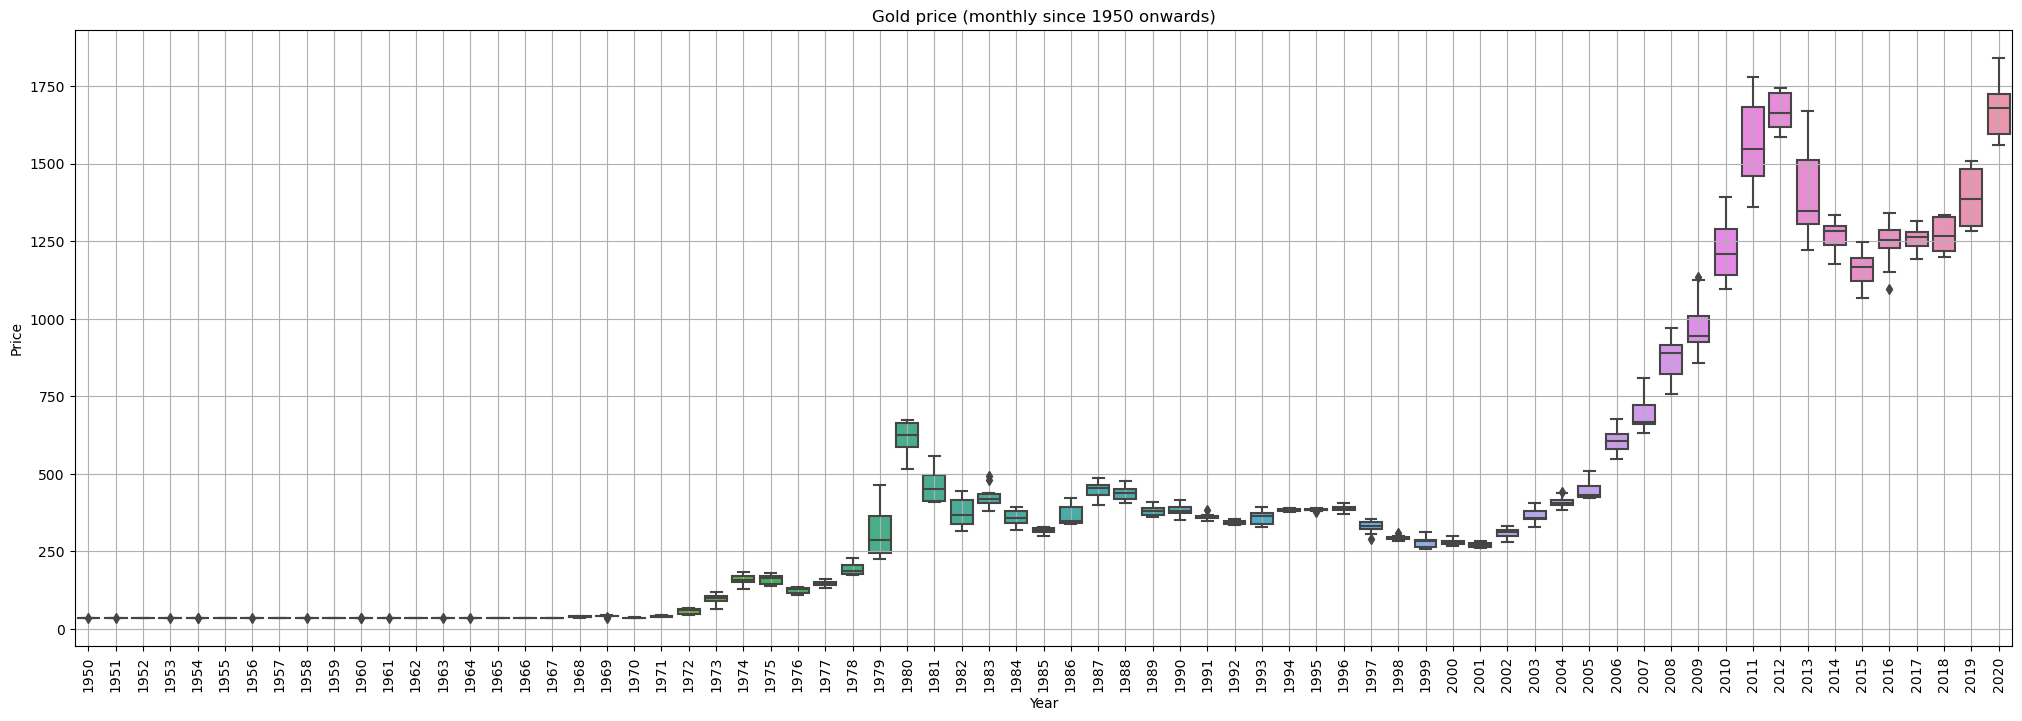

In [131]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year,y=df.values[:,0], ax=ax)
plt.title('Gold price (monthly since 1950 onwards)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation= 90)
plt.grid()


Month Plot Graph

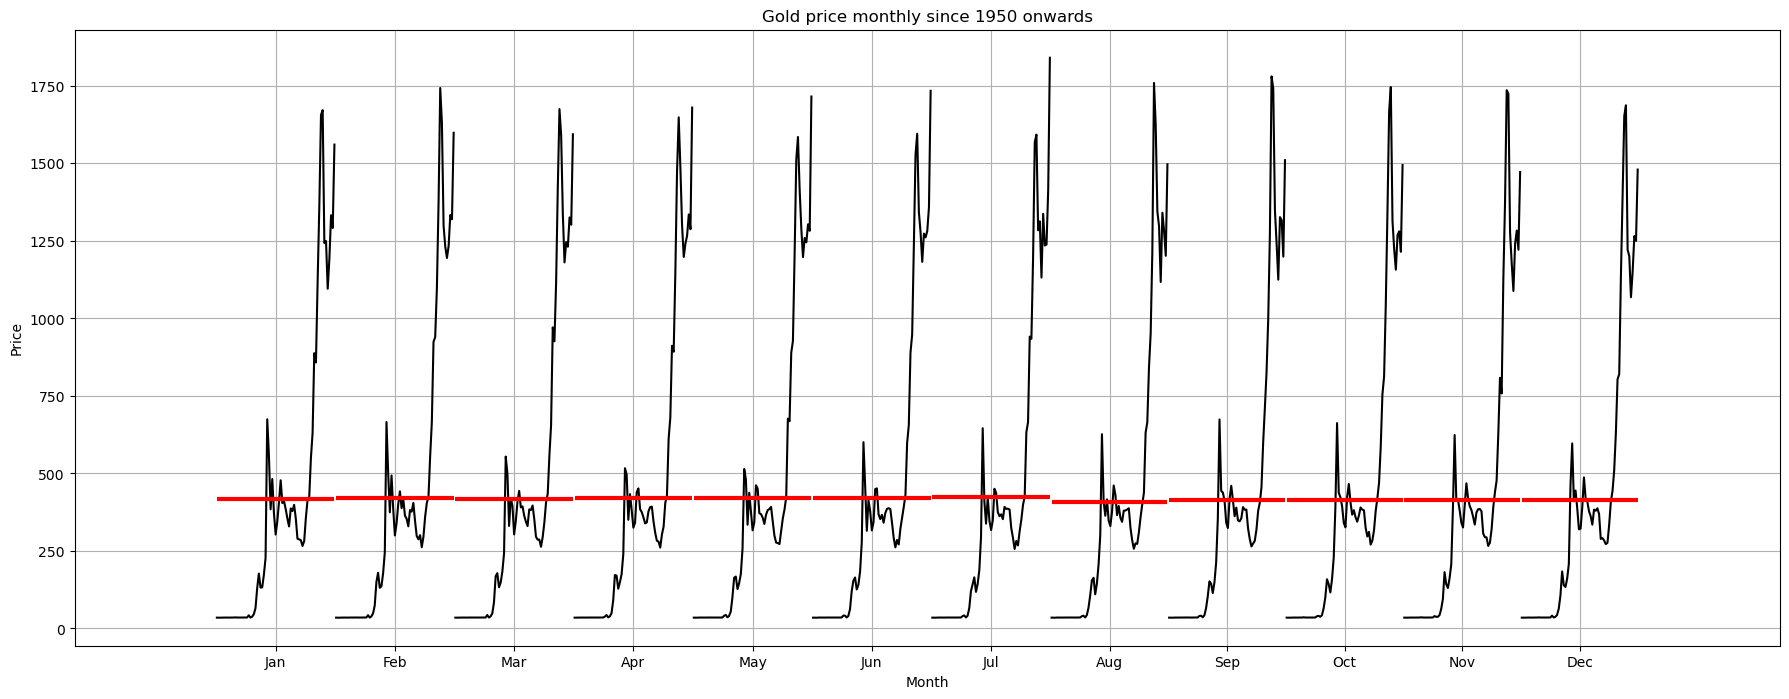

In [132]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df,ylabel ='gold price', ax=ax)
plt.title('Gold price monthly since 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid() #without semicolon, it shows the plot as soon as it's created.

Box Plot For Every Month

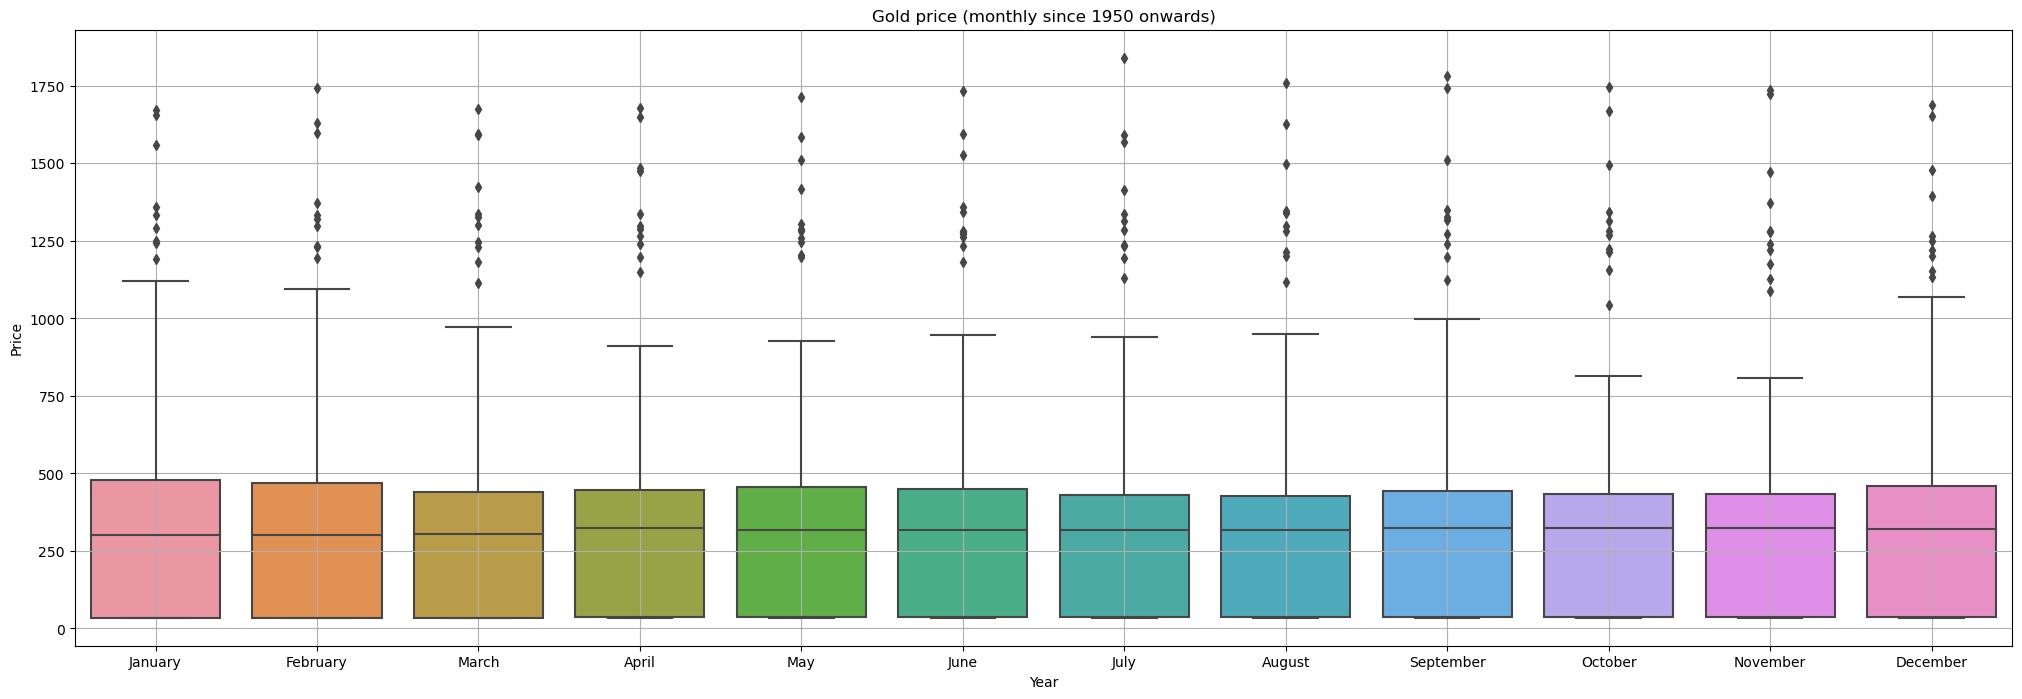

In [133]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.month_name(),y=df.values[:,0], ax=ax)
plt.title('Gold price (monthly since 1950 onwards)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid();

Average Gold price yearly

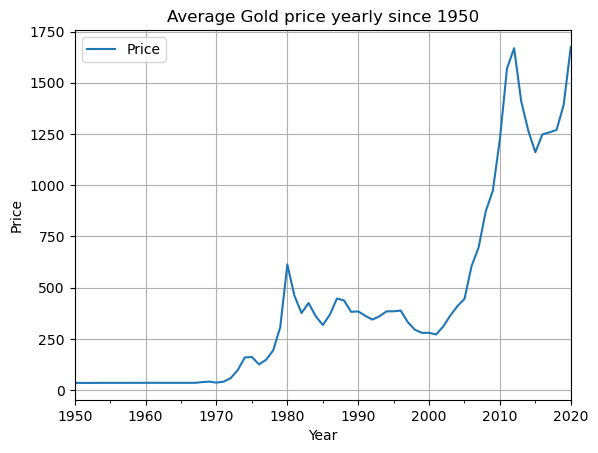

In [134]:
df_yearly_sum =df.resample('A').mean()
df_yearly_sum.plot(); # with semicolon it keeps things quiet until we're ready to see the plot
plt.title("Average Gold price yearly since 1950")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid();

Average Gold price Quaterly

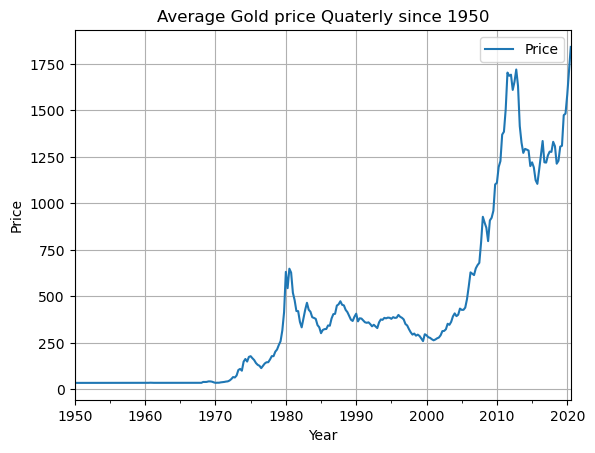

In [135]:
df_Quaterly_sum =df.resample('Q').mean()
df_Quaterly_sum.plot(); # with semicolon it keeps things quiet until we're ready to see the plot
plt.title("Average Gold price Quaterly since 1950")
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid();

Average Gold price Over Decades

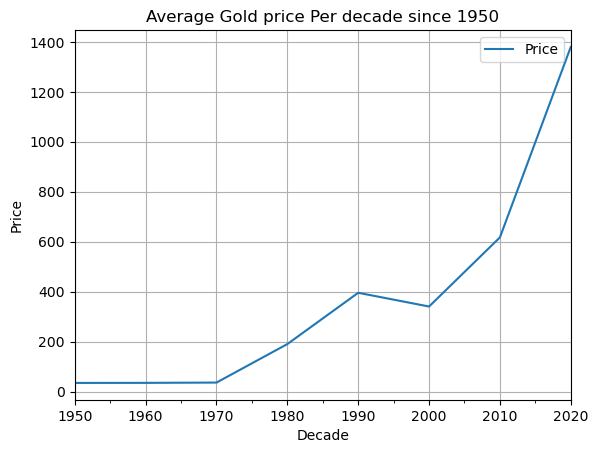

In [136]:
df_Decade_sum = df.resample('10Y').mean()
df_Decade_sum.plot(); # with semicolon it keeps things quiet until we're ready to see the plot
plt.title("Average Gold price Per decade since 1950")
plt.xlabel('Decade')
plt.ylabel('Price')
plt.grid();

Analysis in Coefficient of variation

In [137]:
df_1 =df.groupby(df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}),left_index= True, right_index= True)
df_1['Coefficient of varience'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,Coefficient of varience
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


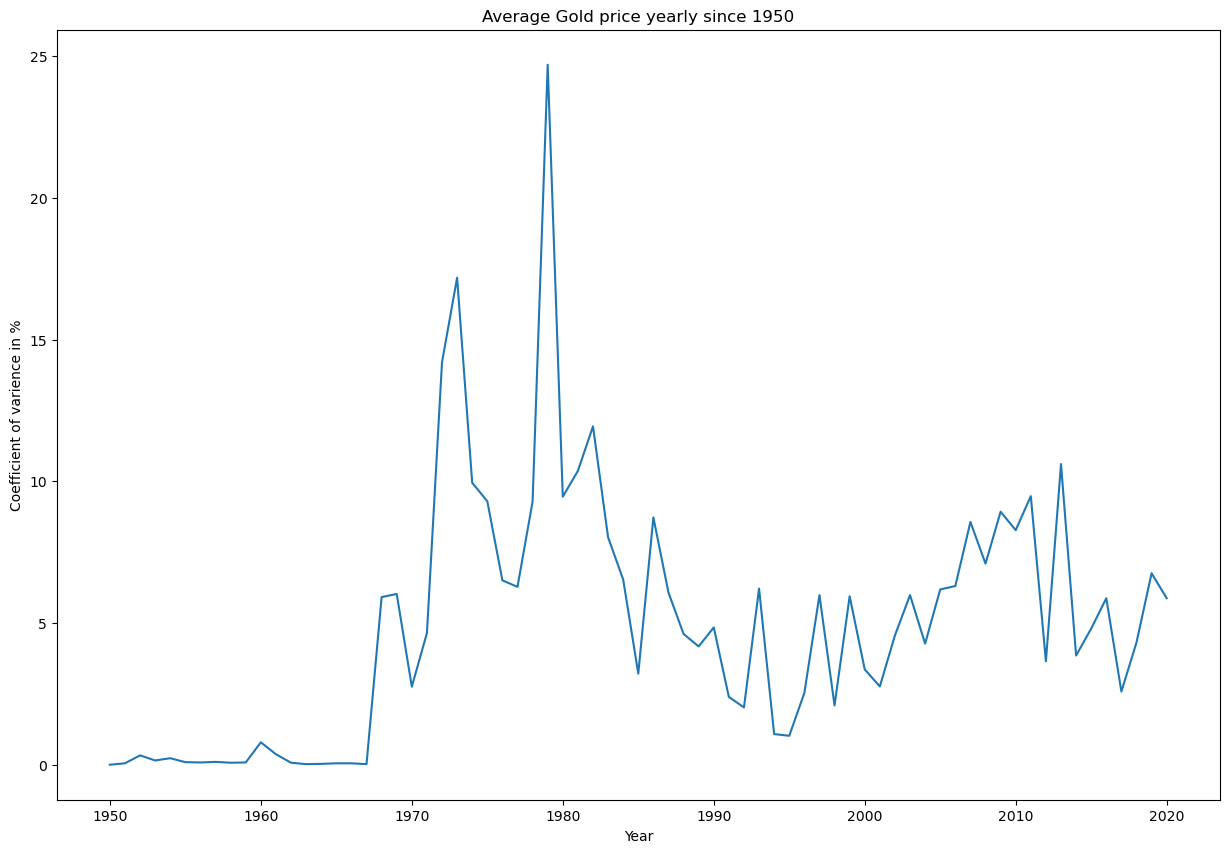

In [138]:
fig,ax=plt.subplots(figsize=(15,10))
df_1['Coefficient of varience'].plot();
plt.title('Average Gold price yearly since 1950')
plt.xlabel('Year')
plt.ylabel('Coefficient of varience in %')
plt.show();

This graph shows invest in gold nearly 1978 was at high risk.

Time series analysis part begans the following

In [139]:
train = df[df.index.year <= 2015]
test= df[df.index.year > 2015]

In [140]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


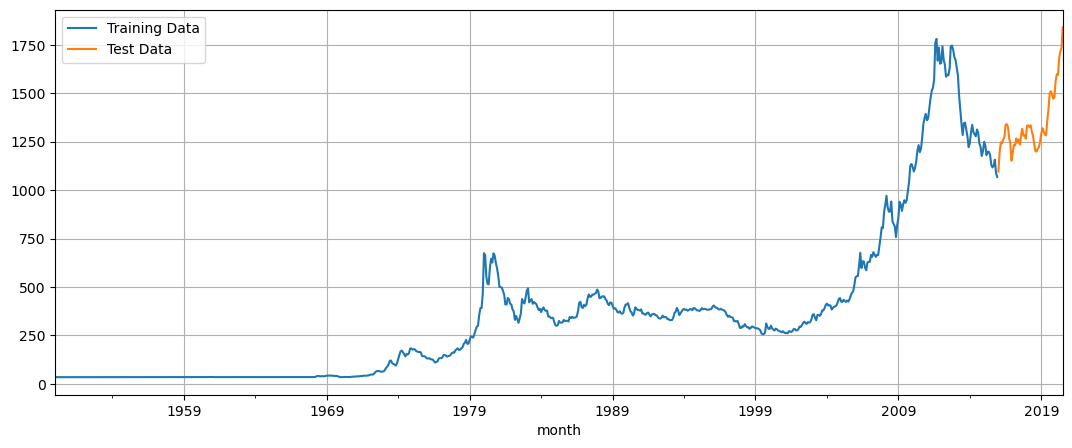

In [141]:
train["Price"].plot(figsize=(13,5))
test["Price"].plot(figsize=(13,5))
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [142]:
train_time=[i+1 for i in range (len(train))]
test_time=[i+len(train)+1 for i in range (len(test))]
len(train_time), len(test_time)

(792, 55)

Linear Regression Forecasting

In [143]:
LR_train=train.copy()
LR_test=test.copy()

In [144]:
LR_train['time']=train_time
LR_test['time']=test_time

In [145]:
linearregression= LinearRegression()
linearregression.fit(LR_train[['time']],LR_train['Price'].values)

LinearRegression()

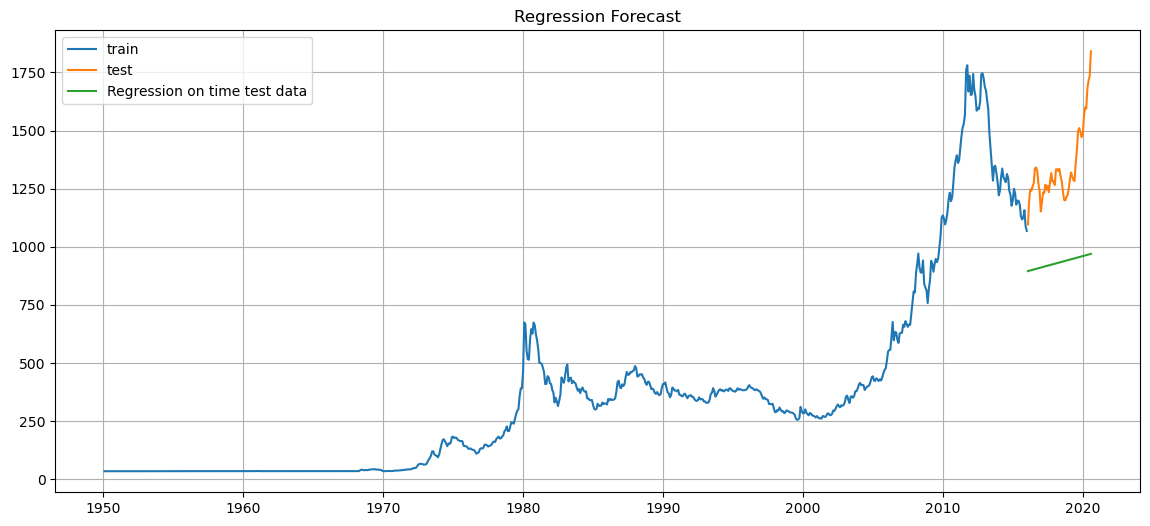

In [146]:
test_prediction_model1= linearregression.predict(LR_test[['time']])
LR_test['forecast']= test_prediction_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'],label= 'train')
plt.plot(test['Price'],label= 'test')
plt.plot(LR_test['forecast'],label= 'Regression on time test data')
plt.legend(loc ='best')
plt.title("Regression Forecast")
plt.grid()

Mean Absolute Percentage Error (MAPE) is a measure of prediction of accuracy of a forecasting method in statistical methods. It provides a measure of the average relative error between the actual and predicted values.

In [147]:
def mape(actual, pred):
    return round ((np.mean(abs(actual-pred)/actual))*100,2) # This calculates the absolute percentage error for each observation.

The mape function takes two arrays (or lists) of actual and predicted values as input and calculates the Mean Absolute Percentage Error (MAPE) between them. It then returns the calculated MAPE value. This function can be used to quantitatively evaluate the accuracy of forecasting models in time series analysis.

In [148]:
mape_model1_test = mape(test['Price'].values,test_prediction_model1)
print("Mape is %3.3f"%(mape_model1_test),"%")

Mape is 29.760 %


This calculates the MAPE between the actual and predicted 'Price' values using the linear regression model, and then prints the MAPE value with a specified format to the console. MAPE is a measure of the average relative error between the actual and predicted values, expressed as a percentage.

In [149]:
results =pd.DataFrame({'Test mape(%)':[mape_model1_test]},index=["RegressionOnTime"])
results

,Test mape(%)
RegressionOnTime,29.76


Naive Forecasting

In [150]:
Naive_train=train.copy()
Naive_test=test.copy()

In [151]:
Naive_test['naive']= np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

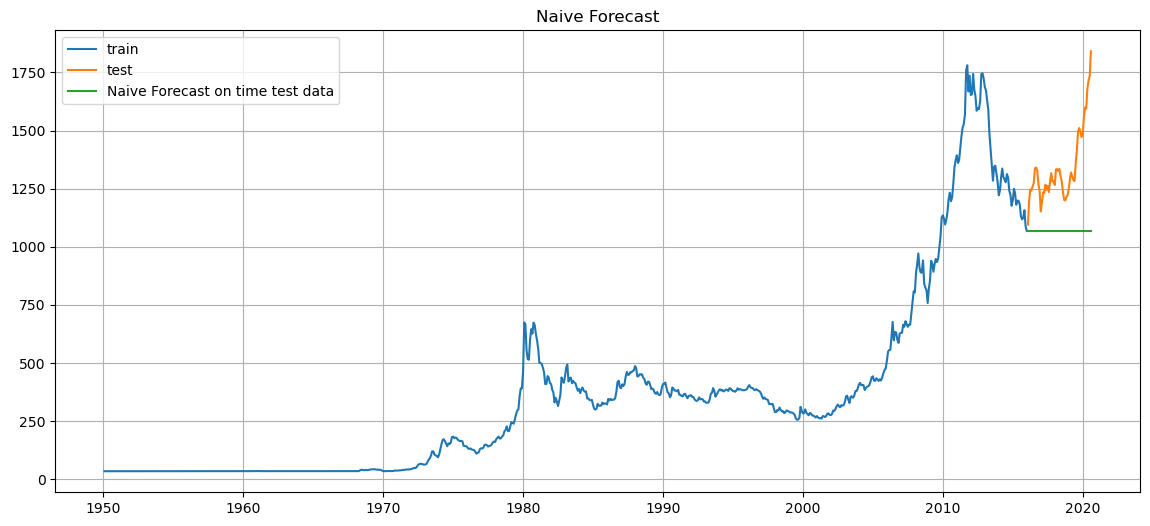

In [152]:
plt.figure(figsize=(14,6))
plt.plot(train['Price'],label= 'train')
plt.plot(test['Price'],label= 'test')
plt.plot(Naive_test['naive'],label= 'Naive Forecast on time test data')
plt.legend(loc ='best')
plt.title("Naive Forecast")
plt.grid()

In [153]:
mape_model2_test = mape(test['Price'].values,Naive_test['naive'].values)
print("For Naive forecast on the Test Data, Mape is %3.3f"%(mape_model2_test),"%")

For Naive forecast on the Test Data, Mape is 19.380 %


This calculates the naive forecast by setting all predicted values in the testing dataset (Naive_test) to the last observed value in the training dataset (train['Price']). This approach assumes that future values will be similar to the most recent past value. By doing this, we can compare the performance of your linear regression model (or any other forecasting model) with this simple naive approach to understand how well our model is performing relative to a basic baseline.

In [154]:
resultsDF_2=pd.DataFrame({"Test Mape(%)":[mape_model2_test]},index=['NaiveModel'])
result= pd.concat([results,resultsDF_2])
result

,Test mape(%),Test Mape(%)
RegressionOnTime,29.76,NaN
NaiveModel,NaN,19.38


Comparing the MAPE values between models allows us to determine which model performs better in terms of forecasting accuracy. In this case, the "NaiveModel" has a lower MAPE value compared to "RegressionOnTime", suggesting that the naive forecasting approach performs better in this specific scenario

Exponential Smoothing Model

In [155]:
final_model = ExponentialSmoothing(df, trend='additive',
                                   seasonal= 'additive').fit(smoothing_level=0.4,
                                                             smoothing_trend=0.3,
                                                             smoothing_seasonal=0.6) #Exponential Smoothing model with additive trend and additive seasonal components

In [156]:
Mape_final_model =mape(df['Price'].values,final_model.fittedvalues)
print("Mape:",Mape_final_model)

Mape: 17.24


The Exponential Smoothing model (final_model) produces a lower MAPE value compared to the Linear Regression and Naive models, it indicates that the Exponential Smoothing model provides more accurate forecasts.

In [157]:
prediction= final_model.forecast(steps=len(test))

In [158]:
pred_df= pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                       'prediction':prediction,
                       'upper_CI':prediction+1.96*np.std(final_model.resid,ddof=1)}) # residuals (errors) of the Exponential Smoothing model, which are the differences between the actual and predicted values.
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154


For those who will not understand upper part, since it's bit tricky

 a DataFrame named pred_df containing lower and upper confidence interval bounds along with the corresponding predictions obtained from the Exponential Smoothing model (final_model)

np.std(final_model.resid, ddof=1): This calculates the standard deviation of the residuals with ddof=1, which adjusts the degrees of freedom to provide an unbiased estimate of the population standard deviation. And here i used 1.96: This value corresponds to the critical z-value for a 95% confidence interval (assuming a normal distribution), allowing us to compute the interval bounds.


The difference between the upper and lower bounds is small, it suggests lower uncertainty and lower risk.

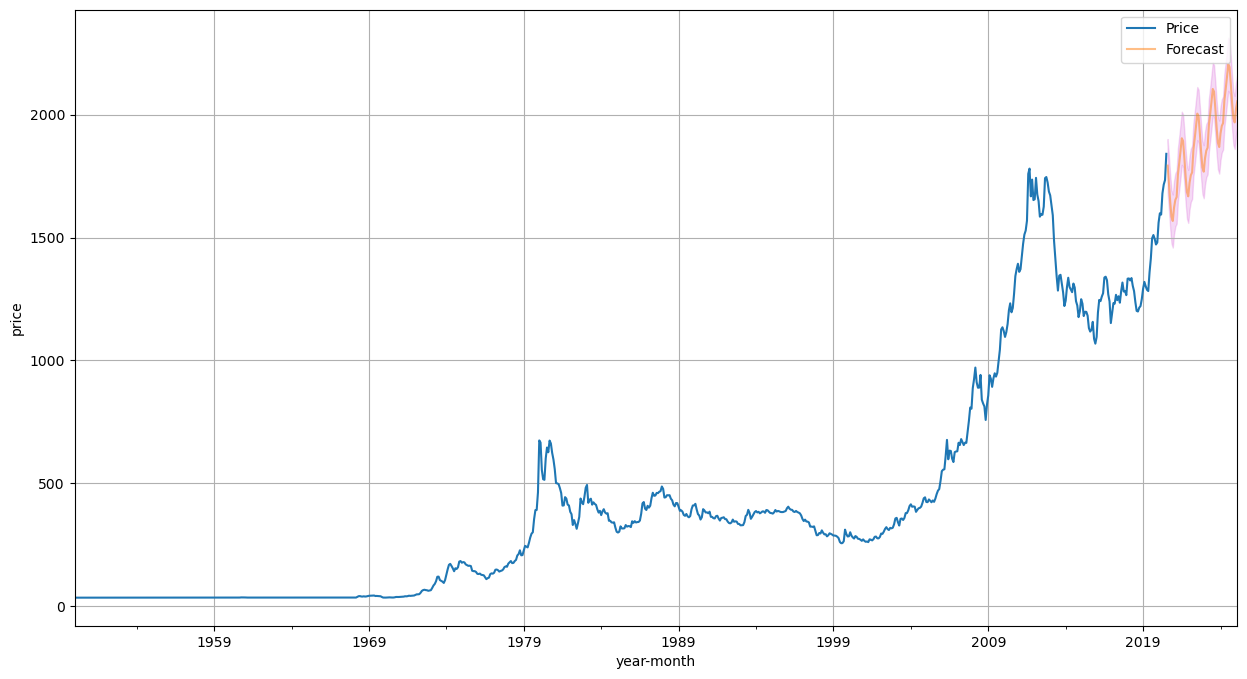

In [159]:
axis=df.plot(label='Actual',figsize=(15,8))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'],pred_df['upper_CI'],color='m',alpha=0.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid();
plt.show()